In [24]:
import random
import matplotlib.pyplot as plt

from os.path import join

from mnist_dataloader import *

In [25]:
#
# Set file paths based on added MNIST Datasets
#
input_path = '../data/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

In [26]:
#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [27]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

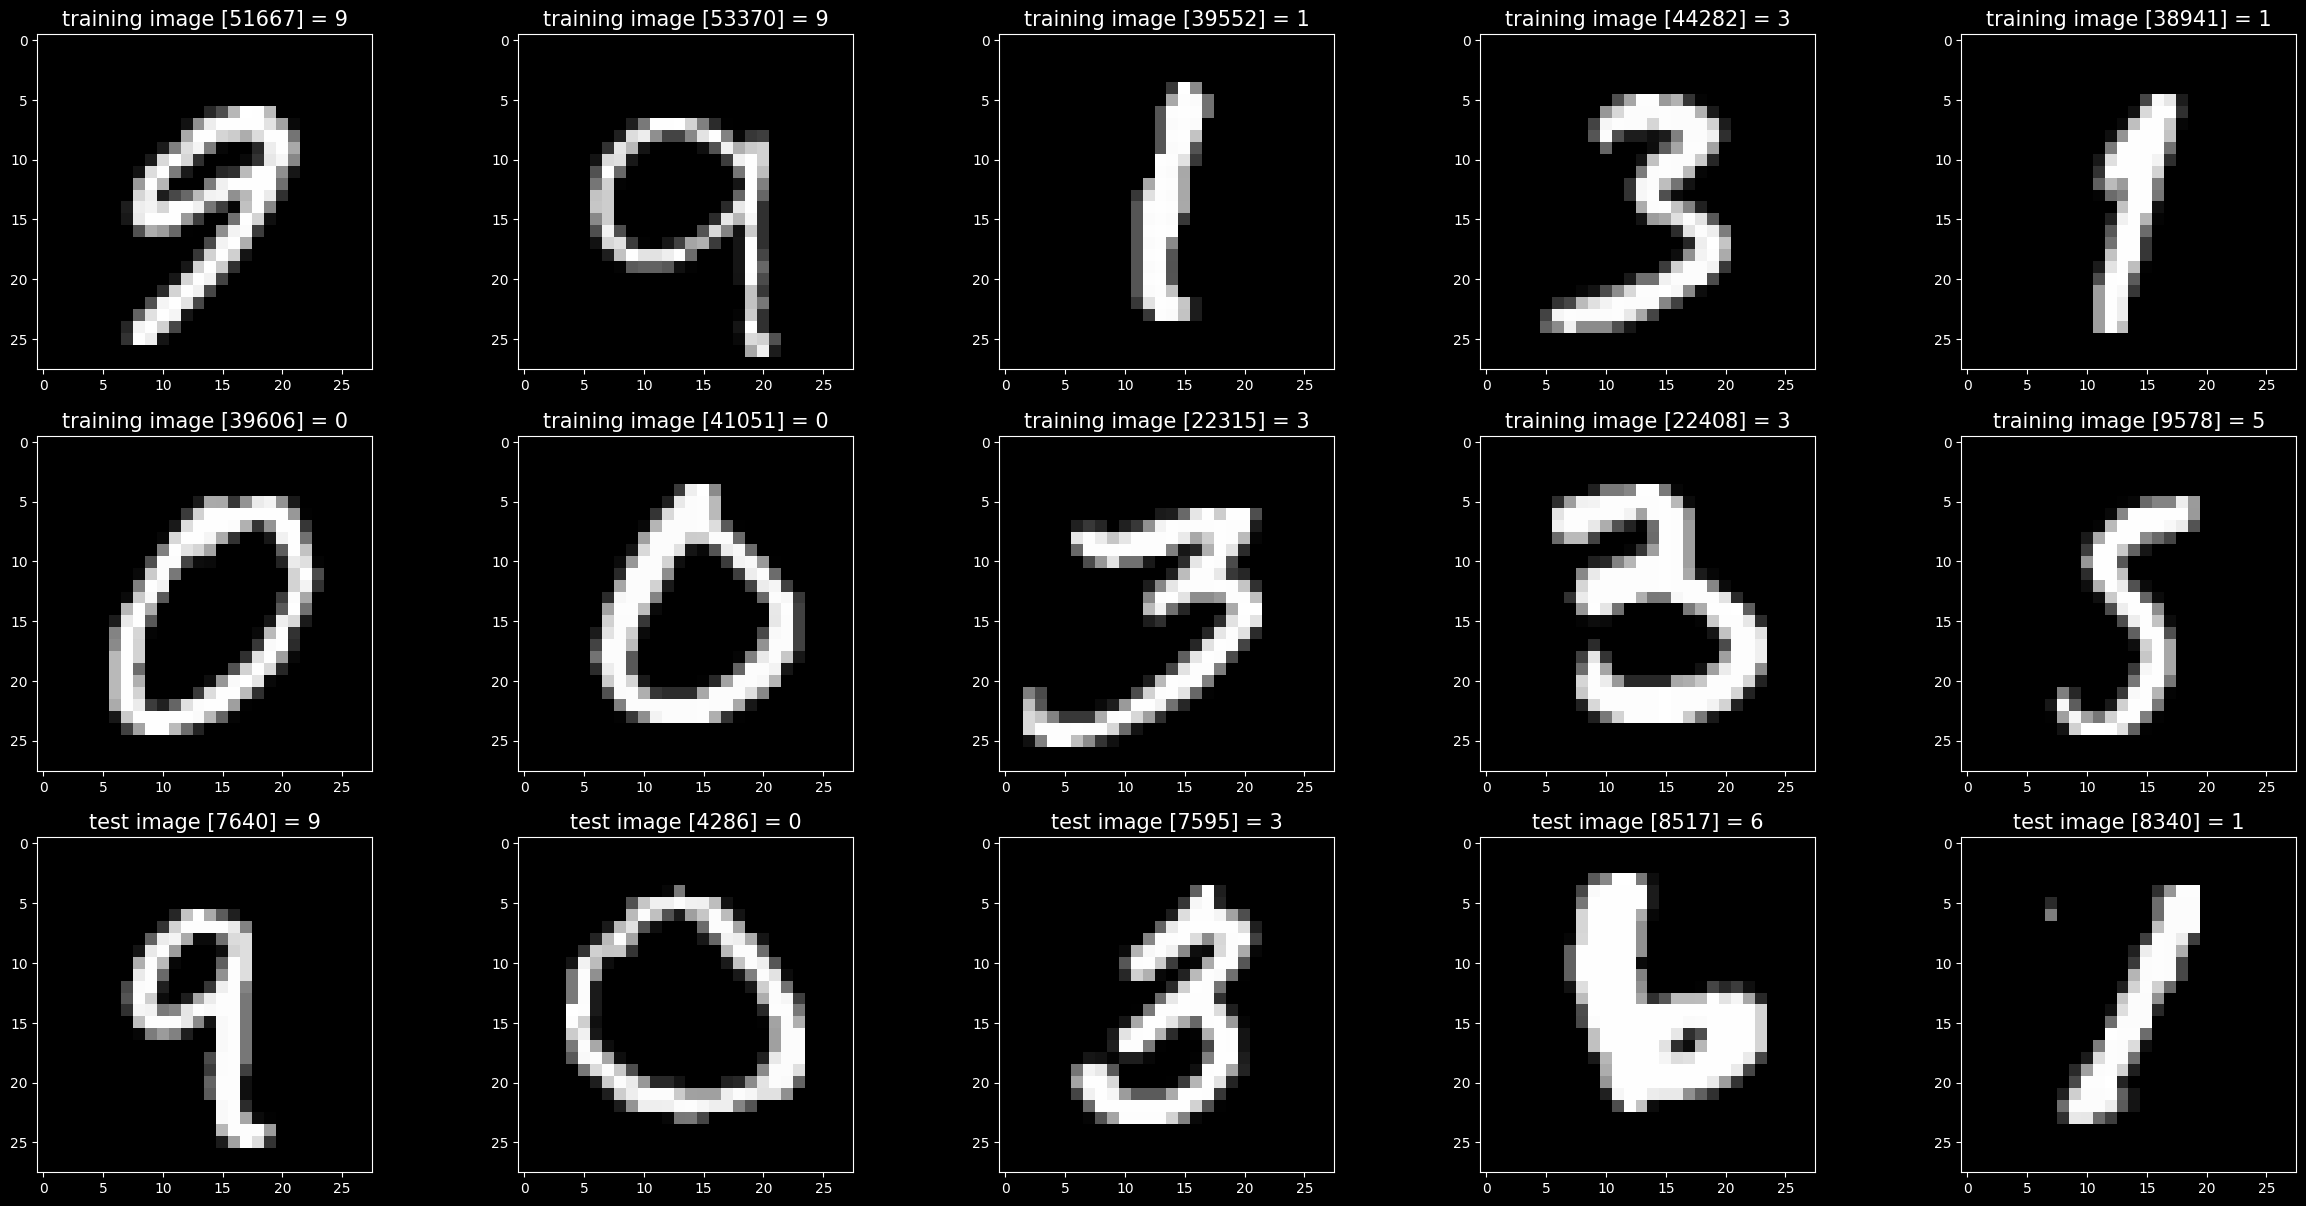

In [28]:
#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [29]:
import numpy as np
import pandas as pd

In [30]:
x_test, x_train = np.array(x_test), np.array(x_train)
y_test, y_train = np.array(y_test), np.array(y_train)

In [31]:
y_test[0], x_test[0].shape

(np.uint8(7), (28, 28))

In [32]:
pd.DataFrame(y_train).value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [33]:
pd.DataFrame(y_test).value_counts()

0
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [34]:
x_test.dtype, x_train.dtype

(dtype('uint8'), dtype('uint8'))

In [35]:
np.min(x_test), np.max(x_test)

(np.uint8(0), np.uint8(255))

In [36]:
np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [37]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [38]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [39]:
x_test, x_train = x_test / 255.0, x_train / 255.0

In [40]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [42]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1568, activation='relu'),
    layers.Dense(784, activation='relu'),
    layers.Dense(392, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
class PrintWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'\nWeights after epoch {epoch + 1}:')
        for layer in self.model.layers:
            weights = layer.get_weights()
            if weights: 
                print(f'Layer {layer.name} weights: {weights[0].shape}')  
                print(weights[0])

In [47]:
history = model.fit(x_train, y_train, epochs=5, batch_size=256, callbacks=[PrintWeightsCallback()])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9782 - loss: 0.0726
Weights after epoch 1:
Layer dense_4 weights: (784, 1568)
[[-0.00843585  0.00746405 -0.04428156 ... -0.00925795  0.02807355
   0.03501725]
 [-0.00444052 -0.01099856 -0.04890982 ...  0.01615394 -0.02252277
  -0.04582911]
 [ 0.03028499  0.04178946  0.03012752 ... -0.01956252 -0.04881089
   0.01721574]
 ...
 [-0.0127542  -0.02502255 -0.04269584 ... -0.02892065 -0.0494721
   0.04361565]
 [ 0.03712749  0.01135088  0.04261844 ... -0.03965785 -0.01454767
   0.03357393]
 [ 0.00720282 -0.02391716 -0.04551555 ... -0.03509009 -0.01410365
   0.030279  ]]
Layer dense_5 weights: (1568, 784)
[[-0.06974918 -0.03499497  0.00676963 ...  0.01063916 -0.00223685
   0.01022676]
 [ 0.05951431  0.01406736 -0.08661921 ...  0.05953777 -0.0076548
   0.01630685]
 [-0.03841896 -0.05690175  0.03130367 ...  0.07008869 -0.01768645
  -0.00681815]
 ...
 [ 0.00832571 -0.02970735 -0.06141209 ... -0.04289442  0.01814802
  -0.02139477]
 [

In [48]:
model.save('model.keras')

In [49]:
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy = {accuracy:.4f}')

accuracy = 0.9797


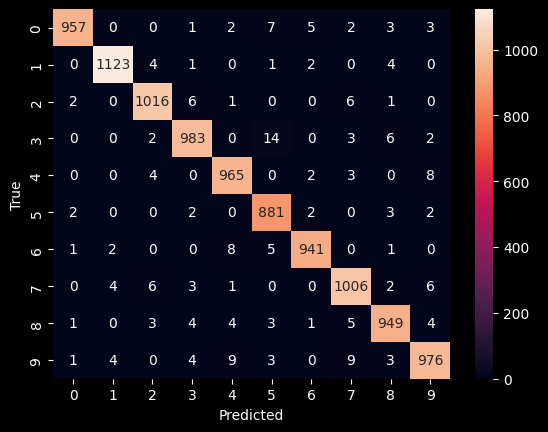

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


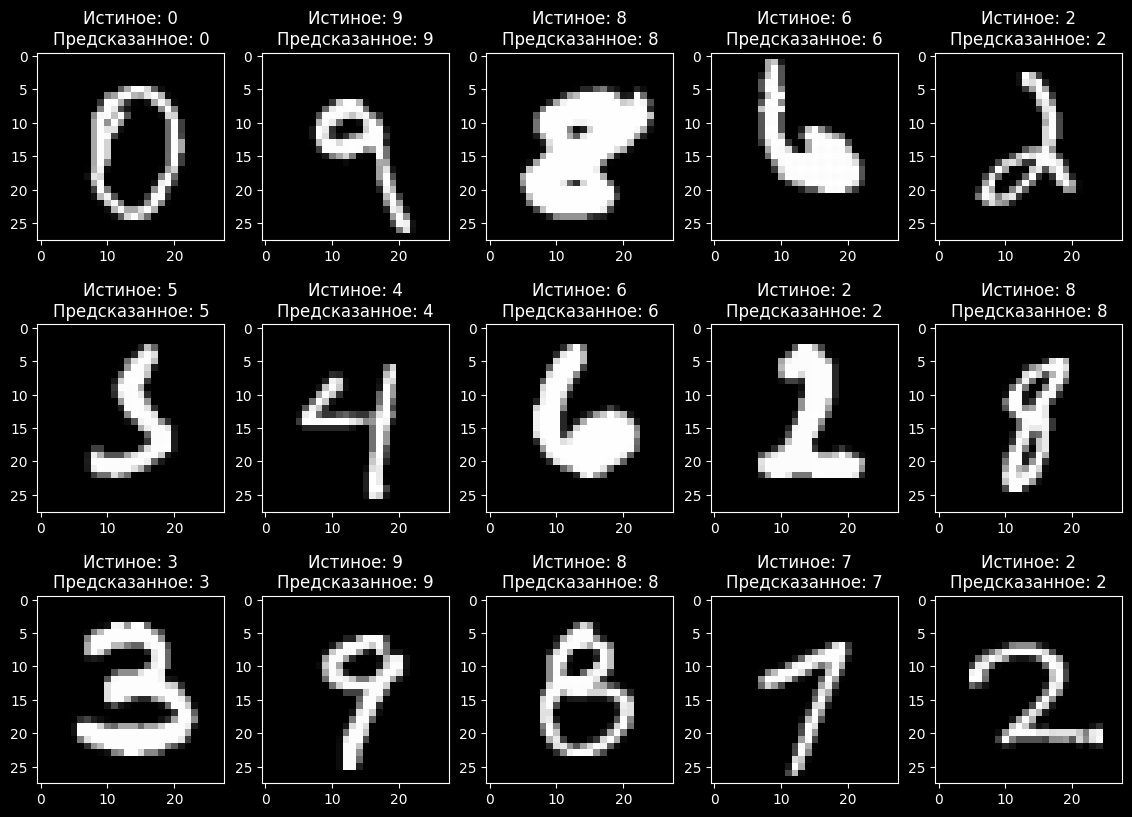

In [55]:
cols = 5
rows = 3

plt.figure(figsize=(14, 10))
   
for _ in range(cols * rows):   
    idx = random.randint(0, x_test.shape[0])

    image = x_test[idx]   
    true_label = y_test[idx]
    pred_label = np.argmax(model.predict(image.reshape(1, 28, 28)))

    plt.subplot(rows, cols, _ + 1)    

    plt.imshow(image, cmap=plt.cm.gray)

    plt.title(f'Истиное: {true_label}\nПредсказанное: {pred_label}'); 

plt.show()